# Housing Wellness

This notebook explores the relationship between median income and home buying cost for U.S. counties and states.

In [1]:
import matplotlib
import numpy as np
import pandas as pd
%matplotlib inline

# Zillow Data

The Zillow Home Value Index (ZHVI) is Zillow's valuation of the median Zillow home for a given geographic area on a given day. More information about the ZHVI and how this is calculated, visit: https://www.zillow.com/wikipages/What%27s-the-Zillow-Home-Value-Index/.

For now, let's just look at the ZHVI score for every County and State in the U.S, sorted by highest ZHVI score.

* San Francisco, New York, and San Jose metro areas are at the top of the list - valued *most expensive* on average.
* A little suburb of San Francisco called Atherton, a neighboring town to Palo Alto and Los Altos, has the highest overall average home value. The average home value in Atherton is $6.3 M. The home value in Atherton is 82% higher than it's neighboring towns, and 29% higher than the second most expensive city - Beverly Hills in Los Angeles, Califronia.


In [2]:
zillow_data = pd.read_csv('http://files.zillowstatic.com/research/public/Zip/Zip_Zhvi_Summary_AllHomes.csv')
zillow_data.fillna("", inplace=True)
zillow_data["County and state"] = zillow_data["County"] + ", " + zillow_data["State"]
zillow_data.sort_values(['Zhvi','State', 'County'], ascending=False).head()

,Date,RegionID,RegionName,State,Metro,County,City,SizeRank,Zhvi,MoM,QoQ,YoY,5Year,10Year,PeakMonth,PeakQuarter,PeakZHVI,PctFallFromPeak,LastTimeAtCurrZHVI,County and state
9413,2017-05-31,97518,94027,CA,San Francisco,San Mateo,Atherton,9413,6307100,0.017832,0.012522,0.0728003,0.12044,0.0526788,2017-05,2017-Q2,6307100,0.000000,2017-05,"San Mateo, CA"
4410,2017-05-31,96086,90210,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,Beverly Hills,4410,4893800,0.006354,0.011638,0.0038976,0.108336,0.0452076,2017-05,2017-Q2,4893800,0.000000,2017-05,"Los Angeles, CA"
10223,2017-05-31,62321,11976,NY,New York,Suffolk,Water Mill,10223,3741400,-0.007507,0.004376,0.153898,0.0846864,,2017-04,2017-Q2,3769700,-0.007507,2017-03,"Suffolk, NY"
5541,2017-05-31,97513,94022,CA,San Jose,Santa Clara,Los Altos,5541,3478300,0.001353,0.003086,0.00861219,0.118011,0.0577541,2017-05,2017-Q2,3478300,0.000000,2017-05,"Santa Clara, CA"
5303,2017-05-31,97691,94301,CA,San Jose,Santa Clara,Palo Alto,5303,3437400,0.003269,0.007267,0.0394944,0.128322,0.0857818,2017-05,2017-Q2,3437400,0.000000,2017-05,"Santa Clara, CA"


The least expensive place to buy a home in the US in Jackson, Mississippi. The average home value there is $33,000. It appears home values have been falling there for at least 10 years.

In [3]:
zillow_data.sort_values(['Zhvi','State', 'County'], ascending=True).head()

,Date,RegionID,RegionName,State,Metro,County,City,SizeRank,Zhvi,MoM,QoQ,YoY,5Year,10Year,PeakMonth,PeakQuarter,PeakZHVI,PctFallFromPeak,LastTimeAtCurrZHVI,County and state
4496,2017-05-31,75217,39213,MS,Jackson,Hinds,Jackson,4496,33000,-0.003021,-0.035088,-0.12,-0.0479927,-0.0301075,2009-07,2009-Q3,64300,-0.486781,,"Hinds, MS"
9882,2017-05-31,75207,39203,MS,Jackson,Hinds,Jackson,9882,33400,-0.014749,-0.059155,-0.183374,-0.0280204,-0.0242651,2009-06,2009-Q2,67100,-0.502235,2001-06,"Hinds, MS"
11973,2017-05-31,77214,44510,OH,Youngstown,Mahoning,Youngstown,11973,33900,-0.011662,-0.034188,0.018018,0.0154394,,2016-11,2016-Q4,35300,-0.039660,2016-07,"Mahoning, OH"
8097,2017-05-31,77207,44502,OH,Youngstown,Mahoning,Youngstown,8097,34100,0.005900,0.020958,0.0894569,0.0121616,,2017-05,2017-Q2,34100,0.000000,2017-05,"Mahoning, OH"
11735,2017-05-31,77211,44506,OH,Youngstown,Mahoning,Youngstown,11735,34200,0.008850,0.014837,0.0857143,0.0159394,,2017-05,2017-Q2,34200,0.000000,2017-05,"Mahoning, OH"


Of the top 1000 cheapest cities to buy a home, the cities experiencing the highest Year over Year increase in home values are:
 * Ahton, IL (Dixon Metro Area)
 * Detroit, MI
 * Wellsville, OH (Salem Metro Area)
 * Wheaton, MN 
 

In [4]:
zillow_data.sort_values(['Zhvi','State', 'County'], ascending=True).head(1000).sort_values('YoY', ascending=False).head()

,Date,RegionID,RegionName,State,Metro,County,City,SizeRank,Zhvi,MoM,QoQ,YoY,5Year,10Year,PeakMonth,PeakQuarter,PeakZHVI,PctFallFromPeak,LastTimeAtCurrZHVI,County and state
12617,2017-05-31,84753,61006,IL,Dixon,Lee,Ashton,12617,75900,0.051247,0.143072,0.432075,-0.0644453,-0.046586,2007-10,2007-Q4,134600,-0.436107,2003-01,"Lee, IL"
7162,2017-05-31,79070,48215,MI,Detroit,Wayne,Detroit,7162,69900,0.024927,0.099057,0.429448,0.0872862,-0.00962733,1996-07,1996-Q3,85500,-0.182456,,"Wayne, MI"
8712,2017-05-31,76922,43968,OH,Salem,Columbiana,Wellsville,8712,67100,0.001493,0.066773,0.397917,0.0688469,0.0162689,2017-05,2017-Q2,67100,0.000000,2017-05,"Columbiana, OH"
7883,2017-05-31,79063,48208,MI,Detroit,Wayne,Detroit,7883,73400,0.025140,0.090639,0.390152,0.0776579,0.00663942,2005-03,2005-Q1,75700,-0.030383,2004-01,"Wayne, MI"
11988,2017-05-31,82761,56296,MN,,Traverse,Wheaton,11988,73400,0.020862,0.069971,0.366853,0.0496747,-0.00529223,2003-10,2003-Q4,116900,-0.372113,1999-07,"Traverse, MN"


## Census Data

In [5]:
census_data = pd.read_excel('https://www.census.gov/did/www/saipe/downloads/estmod15/est15ALL.xls')
census_data.columns = census_data.iloc[2] # Renames columns - found in 3rd row of source file
census_data.drop(census_data.index[:3], inplace=True)
census_data.sort_values(['Postal Code', 'Name']).head()

2,State FIPS Code,County FIPS Code,Postal Code,Name,"Poverty Estimate, All Ages",90% CI Lower Bound,90% CI Upper Bound,"Poverty Percent, All Ages",90% CI Lower Bound,90% CI Upper Bound,...,90% CI Upper Bound,Median Household Income,90% CI Lower Bound,90% CI Upper Bound,"Poverty Estimate, Age 0-4",90% CI Lower Bound,90% CI Upper Bound,"Poverty Percent, Age 0-4",90% CI Lower Bound,90% CI Upper Bound
72,02,000,AK,Alaska,74941,71399,78483,10.4,9.9,10.9,...,14.5,73391,71522,75260,8535,7584,9486,15.8,14,17.6
73,02,013,AK,Aleutians East Borough,582,445,719,17.4,13.3,21.5,...,17.1,57015,51101,62929,.,.,.,.,.,.
74,02,016,AK,Aleutians West Census Area,469,354,584,8.5,6.4,10.6,...,10.2,80695,75363,86027,.,.,.,.,.,.
75,02,020,AK,Anchorage Borough,25305,22232,28378,8.7,7.6,9.8,...,13.1,77791,74640,80942,.,.,.,.,.,.
76,02,050,AK,Bethel Census Area,4271,3510,5032,24.2,19.9,28.5,...,39.1,44849,41322,48376,.,.,.,.,.,.


Need to join FIPS state and county codes from Census report to get County Name

In [6]:
fips_counties = pd.read_csv('https://www2.census.gov/geo/docs/reference/codes/files/national_county.txt',
                            header=None, dtype={0: str, 1: str, 2:str, 3 :str, 4:str})
fips_counties.head()

,0,1,2,3,4
0,AL,01,001,Autauga County,H1
1,AL,01,003,Baldwin County,H1
2,AL,01,005,Barbour County,H1
3,AL,01,007,Bibb County,H1
4,AL,01,009,Blount County,H1


In [7]:
census_merged = pd.merge(census_data,
                         fips_counties,
                         left_on=['State FIPS Code', 'County FIPS Code'],
                         right_on=[1, 2])

census_merged["County and state"] = census_merged["Name"].str.replace(" County", "") + ", " + census_merged["Postal Code"]
census_merged.head()

,State FIPS Code,County FIPS Code,Postal Code,Name,"Poverty Estimate, All Ages",90% CI Lower Bound,90% CI Upper Bound,"Poverty Percent, All Ages",90% CI Lower Bound,90% CI Upper Bound,...,90% CI Upper Bound,"Poverty Percent, Age 0-4",90% CI Lower Bound,90% CI Upper Bound,0,1,2,3,4,County and state
0,01,001,AL,Autauga County,6966,5673,8259,12.7,10.3,15.1,...,.,.,.,.,AL,01,001,Autauga County,H1,"Autauga, AL"
1,01,003,AL,Baldwin County,25941,21665,30217,12.9,10.8,15,...,.,.,.,.,AL,01,003,Baldwin County,H1,"Baldwin, AL"
2,01,005,AL,Barbour County,7380,6240,8520,32,27.1,36.9,...,.,.,.,.,AL,01,005,Barbour County,H1,"Barbour, AL"
3,01,007,AL,Bibb County,4516,3584,5448,22.2,17.6,26.8,...,.,.,.,.,AL,01,007,Bibb County,H1,"Bibb, AL"
4,01,009,AL,Blount County,8399,6798,10000,14.7,11.9,17.5,...,.,.,.,.,AL,01,009,Blount County,H1,"Blount, AL"


## Most expensive places to work and own a home

In [8]:
result = pd.merge(zillow_data, census_merged, left_on=['County and state'], right_on=['County and state'])
result.set_index(['County', 'State'])
result['Median Household Income'] = result['Median Household Income'].astype(float)
result['Zhvi'] = result['Zhvi'].astype(float)
result['Housing Index'] = result['Zhvi'] / result['Median Household Income']

subset = result[['County and state', 'Median Household Income', 'Zhvi', 'Housing Index']].copy()
subset.groupby('County and state').mean().sort_values(['Housing Index'], ascending=False).head()

,Median Household Income,Zhvi,Housing Index
County and state,,,
"New York, NY",75136.0,1.363483e+06,18.146871
"Nantucket, MA",86014.0,1.407000e+06,16.357802
"Kings, NY",51026.0,8.134267e+05,15.941415
"San Mateo, CA",101133.0,1.550284e+06,15.329161
"San Francisco, CA",90527.0,1.225109e+06,13.533075


Median Home Value (Zillow Home Value) is more has wider range than Median Income.

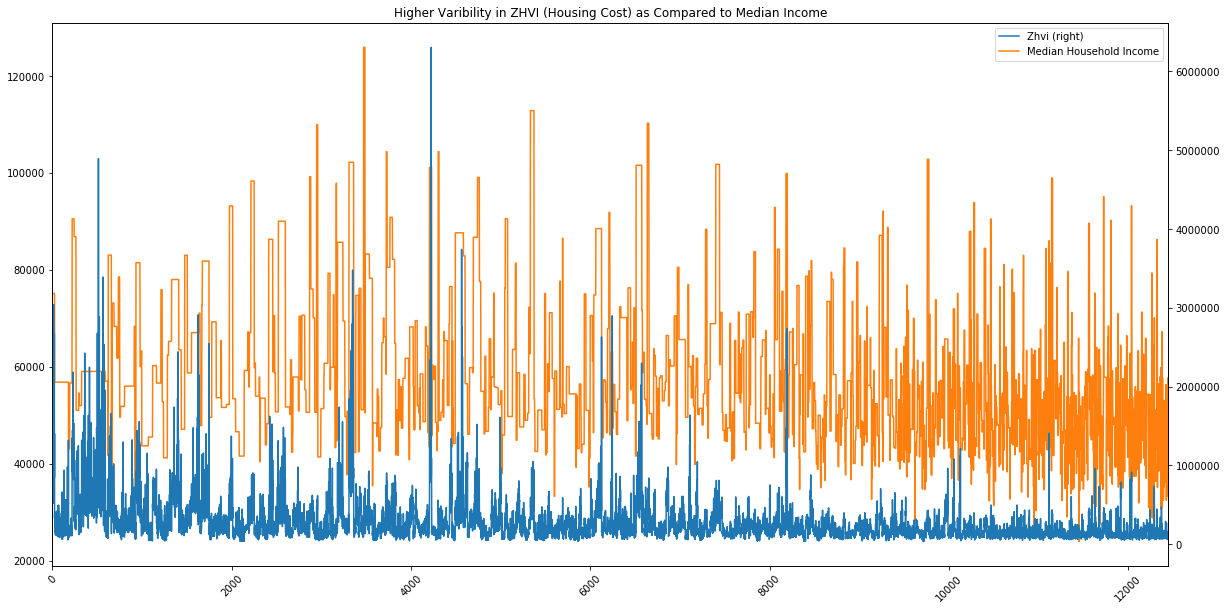

In [9]:
ax = subset.plot(kind='line',
                 y='Zhvi',
                 secondary_y=True,
                 figsize=(20,10),
                 rot=45,
                 title="Higher Varibility in ZHVI (Housing Cost) as Compared to Median Income")
subset.plot(ax = ax, kind='line', y='Median Household Income')

### Best places to work and own a home

Of the top 1000 highest median income income cities, let's sort by cheapest home value.

In [10]:
subset.groupby(['County and state']).mean().sort_values(['Median Household Income'], ascending=False).head(1000).sort_values(['Zhvi'], ascending=True).head()

,Median Household Income,Zhvi,Housing Index
County and state,,,
"Cambria, PA",43786.0,59200.0,1.352030
"Montgomery, IL",46006.0,60200.0,1.308525
"Fayette, IN",42538.0,61200.0,1.438714
"Vermillion, IN",44376.0,64250.0,1.447855
"Harrison, TX",46593.0,64600.0,1.386474


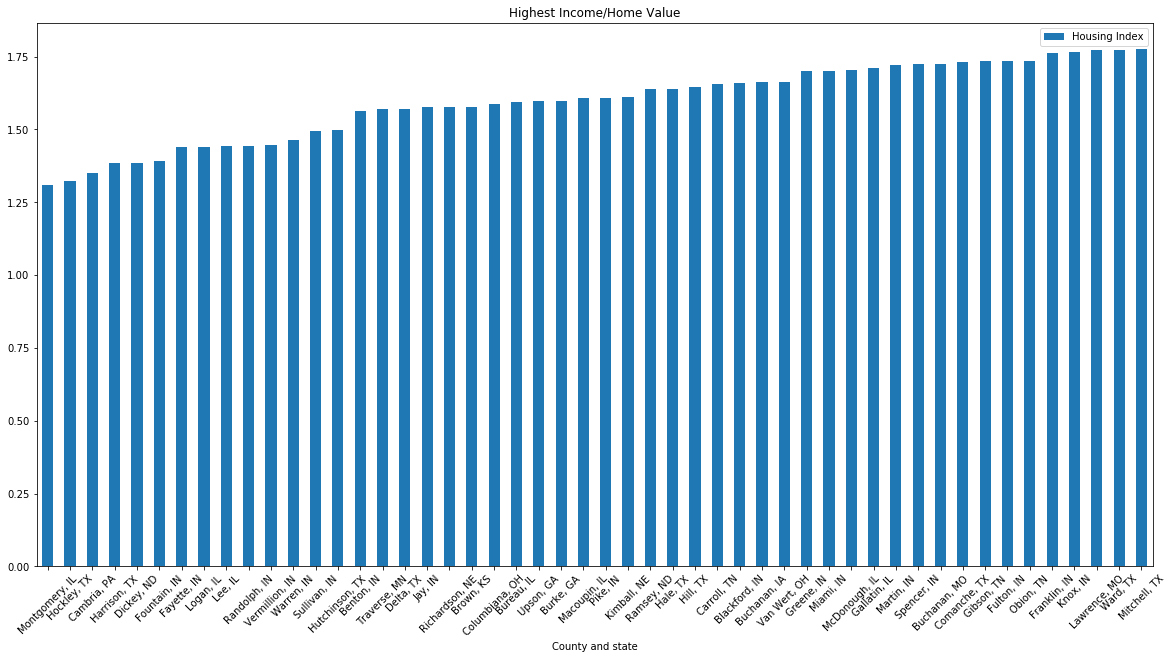

In [11]:
subset = subset.groupby('County and state').mean().sort_values(['Housing Index'], ascending=True)
subset.head(50).plot(kind='bar', y='Housing Index', figsize=(20,10), rot=45, title="Highest Income/Home Value")

While income and are highly correlated.

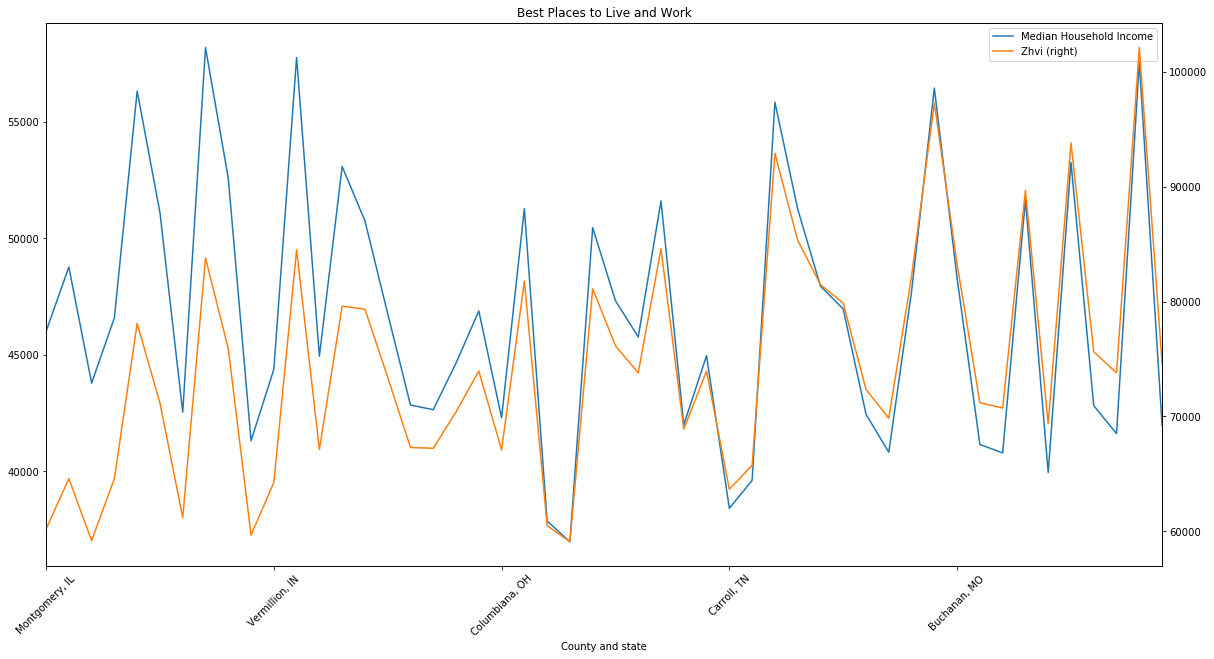

In [12]:
ax = subset.head(50).plot(kind='line', y='Median Household Income', figsize=(20,10), title="Best Places to Live and Work")
subset.head(50).plot(secondary_y=True, ax=ax, rot=45, kind='line', y='Zhvi')

A Housing Index above 3 ( rounded up from mean of 2.97 ) is considered the threshold for "above average expense" classification. 
Any home price above 3.76 is "Very Expensive".

In [13]:
subset.describe()

,Median Household Income,Zhvi,Housing Index
count,1223.000000,1.223000e+03,1223.000000
mean,52540.860180,1.880029e+05,3.424065
std,13899.574353,1.434116e+05,1.780341
min,23968.000000,5.556667e+04,1.308525
25%,43102.000000,1.095667e+05,2.434373
50%,49887.000000,1.454333e+05,2.966832
75%,58218.500000,2.175762e+05,3.756988
max,125900.000000,1.550284e+06,18.146871
